# Praca domowa 3

## Ładowanie podstawowych pakietów

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold # used in crossvalidation
from sklearn.model_selection import KFold

import IPython
from time import time

## Krótki wstęp

Celem zadania jest by bazujac na danych meteorologicznych z australi sprawdzić i wytrenowac 3 różne modele. Równie ważnym celem zadania jest przejrzenie oraz zmiana tzn. hiperparamterów z każdego nich. 

### Załadowanie danych

In [2]:
data = pd.read_csv("../../australia.csv")

### Przyjrzenie się danym

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustSpeed    56420 non-null float64
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null int64
RainTomorrow     56420 non-null int64
dtypes: float64(16), int64(2)
memory usage: 7.7 MB


Nie ma w danych żadnych braków, oraz są one przygotowane idealnie do uczenia maszynowego. Przyjżyjmy się jednak jak wygląda ramka. 

In [4]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


## Random Forest

**Załadowanie potrzebnych bibliotek** 

In [5]:
from sklearn.ensemble import RandomForestClassifier

**Inicjalizowanie modelu**

In [6]:
rf_default  = RandomForestClassifier()

**Hiperparametry**

In [7]:
params = rf_default.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Zmiana kilku hiperparametrów**

In [8]:
params['n_estimators']=150
params['max_depth']=6
params['min_samples_leaf']=4
params['n_jobs']=4
params['random_state']=0

In [9]:
rf_modified = RandomForestClassifier()
rf_modified.set_params(**params)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=4,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Extreme Gradient Boosting

**Załadowanie potrzebnych bibliotek** 

In [10]:
from xgboost import XGBClassifier

**Inicjalizowanie modelu**

In [11]:
xgb_default = XGBClassifier()

**Hiperparametry**

In [12]:
params = xgb_default.get_params()
params

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': False,
 'verbosity': None}

**Zmiana kilku hiperparametrów**

In [13]:
params['n_estimators']=150
params['max_depth']=6
params['n_jobs']=4
params['random_state']=0

In [14]:
xgb_modified = XGBClassifier()
xgb_modified.set_params(**params)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=6,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=4, num_parallel_tree=None,
              objective='binary:logistic', random_state=0, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

## Support Vector Machines

**Załadowanie potrzebnych bibliotek** 

In [15]:
from sklearn.svm import SVC

**Inicjalizowanie modelu**

In [16]:
svc_default = SVC()

**Hiperparametry**

In [17]:
params = svc_default.get_params()
params

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Zmiana kilku hiperparametrów**

In [18]:
params['degree']=3
params['tol']=0.001
params['random_state']=0

In [19]:
svc_modified = SVC()
svc_modified.set_params(**params)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Komentarz
W tym momencie otrzymaliśmy 3 modele z zmienionymi hiperparametrami, oraz ich domyślne odpowiedniki. Zobaczmy teraz jak zmieniły się rezultaty osiągane przez te modele i chociaż nie był to cel tego zadania, zobaczmy czy może udało nam się poprawić jakiś model.

## Porównanie

**Załadowanie potrzebnych bibliotek** 

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

### Funkcje pomocnicze

In [21]:
def cv_classifier(classifier,kfolds = 10, X = data.drop("RainTomorrow", axis = 1), y = data.RainTomorrow):
    start_time = time()
    
    scores ={}
    scores["f1"]=[]
    scores["accuracy"]=[]
    scores["balanced_accuracy"]=[]
    scores["precision"]=[]
    scores["average_precision"]=[]
    scores["roc_auc"]=[]
    
    # Hardcoded crossvalidation metod, could be 
    cv= StratifiedKFold(n_splits=kfolds,shuffle=True,random_state=0)
    
    for i, (train, test) in enumerate(cv.split(X, y)):
        
        IPython.display.clear_output()
        print(f"Model {i+1}/{kfolds}")
        
        # Training model
        classifier.fit(X.iloc[train, ], y.iloc[train], )
        
        # Testing model
        prediction = classifier.predict(X.iloc[test,])
        
        # calculating and savings scores
        scores["f1"].append(                                   f1_score(y.iloc[test],prediction))
        scores["accuracy"].append(                       accuracy_score(y.iloc[test],prediction))
        scores["balanced_accuracy"].append(     balanced_accuracy_score(y.iloc[test],prediction))
        scores["precision"].append(                     precision_score(y.iloc[test],prediction))
        scores["average_precision"].append(     average_precision_score(y.iloc[test],prediction))
        scores["roc_auc"].append(                         roc_auc_score(y.iloc[test],prediction))
    
    IPython.display.clear_output()
    print(f"Crossvalidation on {kfolds} folds done in {round((time()-start_time),2)}s")
        
    return scores

In [22]:
def get_mean_scores(scores_dict):
    means={}
    for score_name in scores_dict:
        means[score_name] = np.mean(scores_dict[score_name])
    return means

In [23]:
def print_mean_scores(mean_scores_dict,precision=4):
    for score_name in mean_scores_dict:
        print(f"Mean {score_name} score is {round(mean_scores_dict[score_name]*100,precision)}%")

### Wyniki

Poniżej zamieszczam wyniki predykcji pokazanych wcześniej modeli. Dla kontrastu nauczyłem zmodyfikowane wersję klasyfikatorów jak i również te domyślne. Ze smutkiem muszę stwierdzić, że nie jestem najlepszy w strzelaniu, ponieważ parametry, które dobrałem znacznie pogarszają skutecznść każdego z modeli. Niemniej jednak by to stwierdzić musiałem sie posłóżyć pewnymi miarami. Są to:
* F1 
* Accuracy
* Balanced Accuracy
* Precision
* Average Precision
* ROC AUC

Wszystkie modele zostały poddane 10 krotnej kroswalidacji, więc przedstawione wyniki są średnią. Kroswalidacja pozwala dokładniej ocenić skutecznosć modelu oraz wyciągajac z nich takie informacje jak odchylenie standardowe wyników, co daje nam możliowść dyskusji na temat działania modelu w skrajnych przypadkach. 

### Random Forest

### Kroswalidacja modeli

In [24]:
scores_rf_default = cv_classifier(rf_default)

Crossvalidation on 10 folds done in 169.77s


In [25]:
scores_rf_modified = cv_classifier(rf_modified)

Crossvalidation on 10 folds done in 35.2s


In [26]:
mean_scores_rf_default = get_mean_scores(scores_rf_default)
mean_scores_rf_modified = get_mean_scores(scores_rf_modified)

**Random forest default**

In [27]:
print_mean_scores(mean_scores_rf_default,precision=2)

Mean f1 score is 62.85%
Mean accuracy score is 86.09%
Mean balanced_accuracy score is 74.38%
Mean precision score is 76.32%
Mean average_precision score is 51.05%
Mean roc_auc score is 74.38%


**Random forest modified**

In [28]:
print_mean_scores(mean_scores_rf_modified,precision=2)

Mean f1 score is 56.74%
Mean accuracy score is 84.97%
Mean balanced_accuracy score is 70.54%
Mean precision score is 77.55%
Mean average_precision score is 46.88%
Mean roc_auc score is 70.54%


## Extreme Gradient Boosting

### Kroswalidacja modeli

In [29]:
scores_xgb_default = cv_classifier(xgb_default)

Crossvalidation on 10 folds done in 41.98s


In [30]:
scores_xgb_modified = cv_classifier(xgb_modified)

Crossvalidation on 10 folds done in 67.69s


In [31]:
mean_scores_xgb_default = get_mean_scores(scores_xgb_default)
mean_scores_xgb_modified = get_mean_scores(scores_xgb_modified)

**XGBoost default**

In [32]:
print_mean_scores(mean_scores_xgb_default,precision=2)

Mean f1 score is 63.79%
Mean accuracy score is 85.92%
Mean balanced_accuracy score is 75.3%
Mean precision score is 73.56%
Mean average_precision score is 51.06%
Mean roc_auc score is 75.3%


**XGBoost modified**

In [33]:
print_mean_scores(mean_scores_xgb_modified,precision=2)

Mean f1 score is 63.93%
Mean accuracy score is 85.89%
Mean balanced_accuracy score is 75.44%
Mean precision score is 73.18%
Mean average_precision score is 51.07%
Mean roc_auc score is 75.44%


## Support Vector Machines

### Kroswalidacja modeli

**warning this takes a while**

In [34]:
scores_svc_default = cv_classifier(svc_default)

Crossvalidation on 10 folds done in 923.06s


In [35]:
scores_svc_modified = cv_classifier(svc_modified)

Crossvalidation on 10 folds done in 864.31s


In [36]:
mean_scores_svc_default = get_mean_scores(scores_svc_default)
mean_scores_svc_modified = get_mean_scores(scores_svc_modified)

**SVM default**

In [37]:
print_mean_scores(mean_scores_svc_default,precision=2)

Mean f1 score is 51.52%
Mean accuracy score is 84.38%
Mean balanced_accuracy score is 67.63%
Mean precision score is 81.47%
Mean average_precision score is 44.44%
Mean roc_auc score is 67.63%


**SVM modified**

In [38]:
print_mean_scores(mean_scores_svc_modified,precision=2)

Mean f1 score is 51.52%
Mean accuracy score is 84.38%
Mean balanced_accuracy score is 67.63%
Mean precision score is 81.47%
Mean average_precision score is 44.44%
Mean roc_auc score is 67.63%


## Podsumowanie

Wyniki random forest oraz xgboost były dośyć zbliżone i szczerze mówiąc dosyć słabe. Jeszcze gorzej wypadł SVM, co pewnie wielu nie zdziwi. Ma okropnie długi czas uczenia, ponad minuta na model. Wypada dużo gorzej niż pozostałe algorytmy, gdzie 10 modeli xgboost zostało wyszkolone w 41s. Natomiast wyniki random forest oraz xgboost są dosyć zbliżone. Gdybym jednak miał wybrać jeden z tych trzech modeli, by dalej go dostrajać na pewno zdecydowałbym się na xgboosta. Między innymi dlatego, że czas uczenia i testowania byłby dużo krótszy niż w przypadku random forest, oraz prawdopodobnie z odpowiednimi parametrami xgboost będzie sobie radził lepiej niż random forest. 

Natomiast wybór najlepszej miary nie jest już taki prosty, a nawet śmiem twierdzić, że nie znalazłem takiej która zasługiwałaby na takie miano. Większość miar w niebanalny sposób reprezentuje jakąś cechę modelu. Natomiast jeżeli musiałbym się ograniczyć do jednej prawdopodobnie wybrałbym ROC_AUC. Z tego powodu, że przez użycie True Positive Rate i False Positive Rate jest ona całkiem logiczna (w przeciwieństwie do wielu), a zarazem wiąć pozwala dobrze tłumaczyć skutecznośc modeli.

# Część bonusowa - Regresja

### Przygotowanie danych

In [39]:
data2 = pd.read_csv('allegro-api-transactions.csv')
data2 = data2.drop(['lp','date'], axis = 1)
data2.head()

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


Dane są prawie gotowe do procesu czenia, trzeba jedynie poprawić `it_location` w którym mogą pojawić się powtórki w stylu *Warszawa* i *warszawa*, a następnie zakodować zmienne kategoryczne

In [40]:
data2.it_location = data2.it_location.str.lower()
data2.head()

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,warszawa,Komputery
1,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,warszawa,"Odzież, Obuwie, Dodatki"
2,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,leszno,Dom i Ogród
3,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,wola krzysztoporska,Książki i Komiksy
4,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,białystok,"Odzież, Obuwie, Dodatki"


In [41]:
encoding_columns = ['categories','seller','it_location','main_category']

## Kodowanie zmiennych kategorycznych 

In [42]:
import category_encoders
from sklearn.preprocessing import OneHotEncoder

### Podział danych 
Nie wykonam standardowego podziału na dane test i train, ponieważ w dalszej części dokumentu do oceny skutecznosci użytych kodowań posłużę się kroswalidacją. Pragnę zaznaczyć, ze prawdopodbnie najlepszą metodą tutaj byłoby rozbicie kategorii `categories` na 26 kolumn, zero-jedynkowych, jednak znacznie by to powiększyło rozmiar danych. Z dokładnie tego samego powodu nie wykonam one hot encodingu, tylko posłużę się kodowaniami, które nie powiększą rozmiatu danych.

In [43]:
X = data2.drop('price', axis = 1)
y = data2.price

## Target encoding

In [44]:
te = category_encoders.target_encoder.TargetEncoder(data2, cols = encoding_columns)
target_encoded = te.fit_transform(X,y)
target_encoded

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,4753602474,61.839771,1,1,44.512149,1,997,0,50177,84.132898,121.810064
1,4773181874,12.375798,1,1,7.868889,1,9288,0,12428,84.132898,75.858049
2,4781627074,105.272597,1,1,132.503382,1,895,0,7389,64.883187,72.434754
3,4783971474,24.072564,1,1,25.027386,0,971,0,15006,35.433365,25.027497
4,4787908274,17.102344,1,1,10.121538,1,950,0,32975,73.772916,75.858049
...,...,...,...,...,...,...,...,...,...,...,...
420015,6099625607,76.811350,0,0,76.811350,0,0,0,176,26.346402,107.534272
420016,6099634607,23.312063,1,1,24.317912,1,2,0,34851,63.645927,28.128577
420017,6099780407,9.630092,1,1,8.887666,1,470,0,983,18.682800,75.858049
420018,6099801007,134.824626,1,0,76.811350,0,0,0,163,104.254805,71.206386


## James-Stein Encoding

In [45]:
js = category_encoders.james_stein.JamesSteinEncoder(cols = encoding_columns)
encoded_js = js.fit_transform(X,y)
encoded_js

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,4753602474,62.074264,1,1,44.944658,1,997,0,50177,79.048949,101.735793
1,4773181874,12.438550,1,1,7.897045,1,9288,0,12428,79.048949,75.894257
2,4781627074,104.607200,1,1,131.180169,1,895,0,7389,66.758534,73.179117
3,4783971474,24.127684,1,1,25.056512,0,971,0,15006,36.283149,25.346202
4,4787908274,17.326369,1,1,10.200595,1,950,0,32975,74.299479,75.894257
...,...,...,...,...,...,...,...,...,...,...,...
420015,6099625607,180.000000,0,0,180.000000,0,0,0,176,26.744870,97.729828
420016,6099634607,23.420553,1,1,24.334451,1,2,0,34851,65.506625,28.654868
420017,6099780407,9.662306,1,1,8.460403,1,470,0,983,18.872366,75.894257
420018,6099801007,132.840349,1,0,200.000000,0,0,0,163,96.193752,71.814470


## Cat Boost Encoding

In [46]:
cb = category_encoders.cat_boost.CatBoostEncoder(cols = encoding_columns)
encoded_cb  = cb.fit_transform(X,y)
encoded_cb

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,4753602474,76.811350,1,1,76.811350,1,997,0,50177,76.811350,76.811350
1,4773181874,76.811350,1,1,76.811350,1,9288,0,12428,68.400675,76.811350
2,4781627074,76.811350,1,1,76.811350,1,895,0,7389,76.811350,76.811350
3,4783971474,76.811350,1,1,76.811350,0,971,0,15006,76.811350,76.811350
4,4787908274,76.811350,1,1,76.811350,1,950,0,32975,76.811350,40.855675
...,...,...,...,...,...,...,...,...,...,...,...
420015,6099625607,76.811350,0,0,76.811350,0,0,0,176,25.955535,107.529199
420016,6099634607,23.396518,1,1,24.997268,1,2,0,34851,63.689039,28.130777
420017,6099780407,9.846671,1,1,20.233558,1,470,0,983,21.515654,75.859354
420018,6099801007,134.386233,1,0,76.811350,0,0,0,163,104.243803,71.203460


## Testowanie

In [47]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model

In [48]:
def cv_encoding(model,kfolds = 10, X = data.drop("RainTomorrow", axis = 1), y = data.RainTomorrow):
    start_time = time()
    
    scores ={}
    scores["r2_score"] = []
    scores['RMSE'] = []
    
    # Standard k-fold
    cv = KFold(n_splits=kfolds,shuffle=False,random_state=0)
    
    for i, (train, test) in enumerate(cv.split(X, y)):
        
        IPython.display.clear_output()
        print(f"Model {i+1}/{kfolds}")
        
        # Training model
        model.fit(X.iloc[train, ], y.iloc[train], )
        
        # Testing model
        prediction = model.predict(X.iloc[test,])
        
        # calculating and savings score
        scores['r2_score'].append(            r2_score(y.iloc[test],prediction))
        scores['RMSE'].append(      mean_squared_error(y.iloc[test],prediction))
        
    
    IPython.display.clear_output()
    print(f"Crossvalidation on {kfolds} folds done in {round((time()-start_time),2)}s")
        
    return scores

## Mierzenie skutecznosci kodowań
Zdecydowałem isę skorzystać z modelu regresji liniowej `Lasso` początkowo chciałem skorzystać z `Elastic Net`, ale jak się okazało zmienne nie sa ze sobą zbytnio powiązane, a to miał być główny powód do jego użycia.

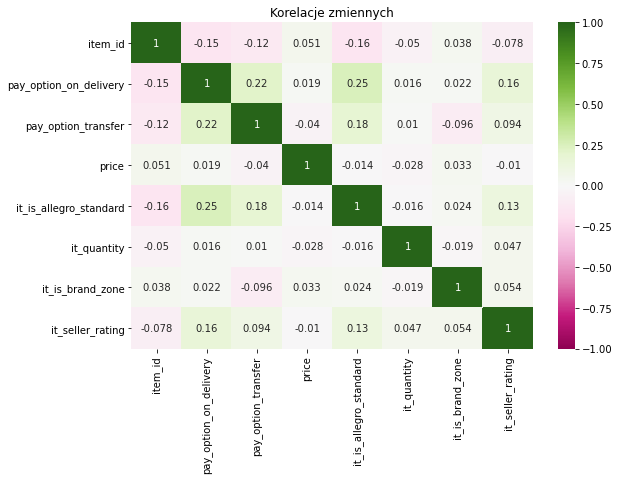

In [49]:
corr=data2.corr()
fig, ax=plt.subplots(figsize=(9,6))  
ax=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="PiYG", center=0, vmin=-1, vmax=1)
ax.set_title('Korelacje zmiennych')
plt.show();

### Wybór modelu liniowego
Określam go w tym miejscu, ponieważ w dalszych częściach dokumentu będę z niego wielokrotnie korzystał przy kroswalidacji

In [50]:
lasso = linear_model.Lasso()

## Wyniki target encodingu

In [52]:
target_encoding_scores = cv_encoding(model = lasso,kfolds=20, X = target_encoded, y = y)

Crossvalidation on 20 folds done in 8.57s


In [53]:
target_encoding_scores_mean = get_mean_scores(target_encoding_scores)
target_encoding_scores_mean

{'r2_score': 0.4190763171299697, 'RMSE': 108681.29114687027}

## Wyniki James-Stein Encodingu

In [56]:
js_encoding_scores = cv_encoding(lasso, 20, encoded_js, y)

Crossvalidation on 20 folds done in 24.17s


In [59]:
js_encoding_scores_mean = get_mean_scores(js_encoding_scores)
js_encoding_scores_mean

{'r2_score': 0.7353177789743055, 'RMSE': 20007.459841643613}

## Wyniki Cat Boost Encodingu

In [57]:
cb_encoding_scores = cv_encoding(lasso, 20 ,encoded_cb, y)

Crossvalidation on 20 folds done in 11.04s


In [58]:
cb_encoding_scores_mean = get_mean_scores(cb_encoding_scores)
cb_encoding_scores_mean

{'r2_score': 0.30340065391896087, 'RMSE': 127742.40789425164}

## Porównanie

## Wyniki metryki r2

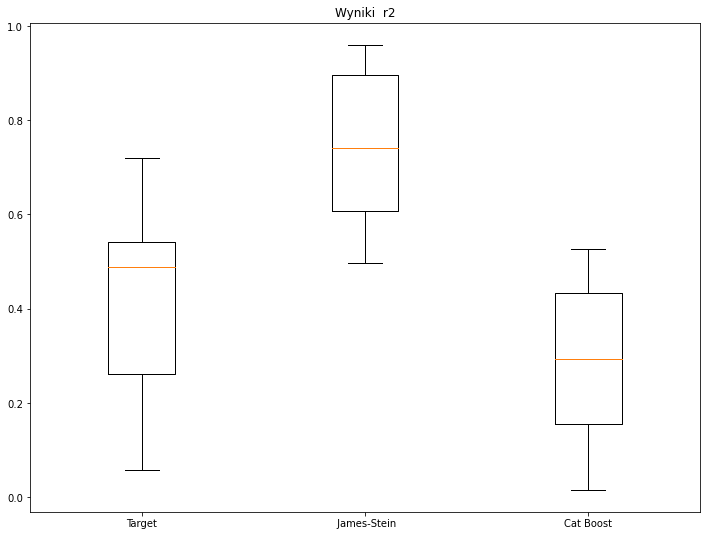

In [62]:
r2_data = [target_encoding_scores["r2_score"], js_encoding_scores["r2_score"], cb_encoding_scores["r2_score"]]
labels = ["Target", " James-Stein", "Cat Boost"]
fig, ax = plt.subplots(figsize = (12,9))
ax.set_title('Wyniki  r2')
ax.boxplot(r2_data, labels = labels)
plt.show()

**Komentarz** 

Widać, że użycie kodowania Jamesa-Steina pozwoliło modelowi dużo lepiej się dopasować do danych, jednak stwarza to ewentaulny problem nadmiernego dopasowania się do danych. Warto by było sprawdzić czy przez ten sposób kodowania nie dochodzi do dużo silniejszego overfittingu. 

## Wynikii metryki RMSE

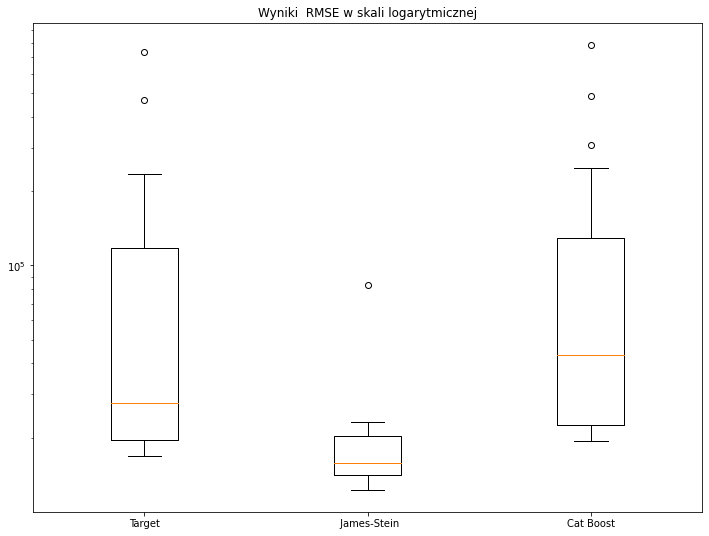

In [65]:
rmse_data = [target_encoding_scores["RMSE"], js_encoding_scores["RMSE"], cb_encoding_scores["RMSE"]]
labels = ["Target", " James-Stein", "Cat Boost"]
fig, ax = plt.subplots(figsize = (12,9))
ax.set_title('Wyniki  RMSE w skali logarytmicznej')
ax.set_yscale('log')
ax.boxplot(rmse_data, labels = labels)
plt.show()

**Komentarz**

Najlepiej poradził sobie James-Stein Encoding, nic dziwnego ponieważ r2 wskazał nam już lepsze dopasowanie modelu.  

## Podsumowanie

Kodowanie Jamesa-Steina osiąga dużo lepsze wyniki niż pozostałe dwa przez mnie wybrane. O ile nie dochodzi w tym przypadku do overfittingu, to w tej grupie z pewnością wybrałbym właśnie to kodowanie. Warto się jednak zastanowić nad kodowaniem one-hot, które w tym przypadku wydaje się bardzo naturale, jednakże wiąże się z kilkukrotnym powiększeniem danych.